# EDA "justica_eleitoral"

In [1]:
import pandas as pd
import numpy as np
import json
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
import dask.dataframe as dd
from pandas.io.json import json_normalize #package for flattening json in pandas df


# Seting data location

In [2]:
path_to_json = './base/justica_estadual/processos-tjpr'
json_files = glob(path_to_json + '/*.json')
print(f'{len(json_files)} files found.')

12 files found.


# Reading all jsons and concating in single DataFrame

In [3]:
df = pd.concat((pd.read_json(json_file) for json_file in json_files), axis=0)
print(df.shape)
df.head()

(59867, 5)


,millisInsercao,dadosBasicos,siglaTribunal,movimento,grau
0,1599650015663,"{'valorCausa': 727.36, 'numero': '001103782201...",TJPR,"[{'identificadorMovimento': '1', 'tipoResponsa...",G1
1,1599683790301,"{'valorCausa': 439.5, 'numero': '0005620532010...",TJPR,"[{'identificadorMovimento': '1', 'tipoResponsa...",G1
2,1599663959976,"{'valorCausa': 208.67, 'numero': '000564821201...",TJPR,"[{'identificadorMovimento': '1', 'tipoResponsa...",G1
3,1599674284483,"{'valorCausa': 319.12, 'numero': '000561531201...",TJPR,"[{'identificadorMovimento': '1', 'tipoResponsa...",G1
4,1599674075618,"{'valorCausa': 433.56, 'numero': '000561616201...",TJPR,"[{'identificadorMovimento': '1', 'tipoResponsa...",G1


<AxesSubplot:ylabel='None'>

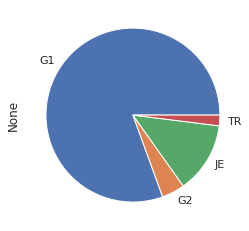

In [4]:
df.groupby('grau').size().plot.pie()

# Displaying samples

Columns 'dadosBasicos' and 'movimento' are still dicts objects, let's take a look in some samples

## dadosBasicos

## movimento

In [5]:

dfItem = pd.DataFrame.from_records(df['movimento'])
dfItem.head(3)

AttributeError: 'builtin_function_or_method' object has no attribute 'get_indexer'

In [ ]:
samples = df['movimento'].sample(5)
json = pd.read_json(samples)
#for s in samples:
#    s.type
#    print('=======')